# This notebook performs tasks for the 08/05/25 meeting
#### Shared doc: https://docs.google.com/document/d/1sHDFxsh4fMPO40zx09iNzCzoPbF_o8x5ksXAXNOoD3M/edit?usp=sharing

In [1]:
genome_ids = ['HG01920', 'HG02003', 'HG02008', 'HG02271', 'HG01973', 'HG02278', 'HG01917', 'HG01997', 'HG01892', 'HG01982', 'HG01979', 'HG01991', 'HG02262', 'HG01950', 'HG02286', 'HG01980', 'HG01948', 'HG01926', 'HG01961', 'HG02277', 'HG02266', 'HG01941', 'HG02002', 'HG01967', 'HG02252', 'HG02272', 'HG01578', 'HG02285', 'HG02260', 'HG02348', 'HG01992', 'HG01951', 'HG02090', 'HG01971', 'HG02292', 'HG01932', 'HG01935', 'HG02425', 'HG02006', 'HG01954', 'HG02253', 'HG02147', 'HG01974', 'HG02259', 'HG01965', 'HG02345', 'HG01924', 'HG01572', 'HG01942', 'HG01927', 'HG02298', 'HG01947', 'HG02274', 'HG01970', 'HG02291', 'HG01944', 'HG01953', 'HG02275', 'HG01939', 'HG01923', 'HG01918', 'HG01571', 'HG01566', 'HG01945', 'HG02104', 'HG01977', 'HG02105', 'HG01968', 'HG01893', 'HG02146', 'HG02089', 'HG02312', 'HG01577', 'HG02150', 'HG02304', 'HG01921', 'HG02299', 'HG02265', 'HG02301', 'HG01976', 'HG01565', 'HG01936', 'HG01938', 'HG01933', 'HG02102']

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
from pathlib import Path

# 1. Create table with variant count per genome, per gene & the statistics for all genes/genomes 


## Load csv file

In [3]:
root_dir = join(Path.home(),"cp_als/populations")

In [4]:
infile = join(root_dir,"output/PEL/all.csv")
infile

'/Users/emilyvu/cp_als/populations/output/PEL/all.csv'

In [5]:
df = pd.read_csv(infile)

In [6]:
df = df[genome_ids + ['gene']]
df.head()

,HG01920,HG02003,HG02008,HG02271,HG01973,HG02278,HG01917,HG01997,HG01892,HG01982,...,HG02299,HG02265,HG02301,HG01976,HG01565,HG01936,HG01938,HG01933,HG02102,gene
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TARDBP
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,TARDBP


## Computer variant count per gene and per genome

In [7]:
sdf=df.groupby(["gene"]).sum()

In [8]:
sdf.head()

,HG01920,HG02003,HG02008,HG02271,HG01973,HG02278,HG01917,HG01997,HG01892,HG01982,...,HG01921,HG02299,HG02265,HG02301,HG01976,HG01565,HG01936,HG01938,HG01933,HG02102
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,3,10,2,6,2,38,0,3,5,2,...,24,7,8,3,9,7,2,35,45,3
ANG,9,0,10,10,6,2,9,10,9,18,...,1,10,1,10,1,9,0,10,9,13
ATXN2,9,11,13,11,16,16,7,10,20,7,...,10,7,11,10,11,16,9,9,166,14
C19ORF12,4,7,6,6,9,8,4,5,7,8,...,10,10,7,11,8,11,20,11,10,7
C9ORF72,15,14,27,16,21,12,1,13,4,12,...,13,14,12,15,24,13,18,15,13,35


## Compute mean99

In [9]:
mean99 = pd.DataFrame(sdf.sum()/99)

In [10]:
mean99.head()

,0
HG01920,11.494949
HG02003,7.686869
HG02008,8.292929
HG02271,16.292929
HG01973,11.989899


In [11]:
m99 = mean99.transpose()

In [12]:
m99

,HG01920,HG02003,HG02008,HG02271,HG01973,HG02278,HG01917,HG01997,HG01892,HG01982,...,HG01921,HG02299,HG02265,HG02301,HG01976,HG01565,HG01936,HG01938,HG01933,HG02102
0,11.494949,7.686869,8.292929,16.292929,11.989899,10.494949,11.161616,11.838384,13.545455,8.585859,...,11.222222,9.69697,13.171717,11.808081,12.717172,14.080808,5.676768,10.050505,14.646465,12.10101


## Name the row "mean99" to append to the dataframe 

In [13]:
m99.index=["mean99"]

In [14]:
m99.head()

,HG01920,HG02003,HG02008,HG02271,HG01973,HG02278,HG01917,HG01997,HG01892,HG01982,...,HG01921,HG02299,HG02265,HG02301,HG01976,HG01565,HG01936,HG01938,HG01933,HG02102
mean99,11.494949,7.686869,8.292929,16.292929,11.989899,10.494949,11.161616,11.838384,13.545455,8.585859,...,11.222222,9.69697,13.171717,11.808081,12.717172,14.080808,5.676768,10.050505,14.646465,12.10101


## Compute statistics per genome, across all genes

In [15]:
genome_stats= sdf.describe()

In [16]:
genome_stats.head()

,HG01920,HG02003,HG02008,HG02271,HG01973,HG02278,HG01917,HG01997,HG01892,HG01982,...,HG01921,HG02299,HG02265,HG02301,HG01976,HG01565,HG01936,HG01938,HG01933,HG02102
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,31.611111,21.138889,22.805556,44.805556,32.972222,28.861111,30.694444,32.555556,37.250000,23.611111,...,30.861111,26.666667,36.222222,32.472222,34.972222,38.722222,15.611111,27.638889,40.277778,33.277778
std,143.331440,63.700708,80.548058,185.825082,108.939429,84.064993,145.338977,145.890849,151.751183,79.607350,...,122.076827,104.103794,114.975056,131.192876,135.558208,165.694144,43.951452,107.751607,151.228231,94.331819
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,1.750000,3.000000,1.750000,...,1.000000,1.000000,1.000000,1.750000,2.000000,1.000000,1.750000,1.750000,1.000000,1.000000


### Adding new rows for genomes to show variant statistics

In [17]:
genome_stats_df = pd.concat([sdf,genome_stats,m99],axis=0)

In [18]:
genome_stats_df

,HG01920,HG02003,HG02008,HG02271,HG01973,HG02278,HG01917,HG01997,HG01892,HG01982,...,HG01921,HG02299,HG02265,HG02301,HG01976,HG01565,HG01936,HG01938,HG01933,HG02102
ALS2,3.000000,10.000000,2.000000,6.000000,2.000000,38.000000,0.000000,3.000000,5.000000,2.000000,...,24.000000,7.000000,8.000000,3.000000,9.000000,7.000000,2.000000,35.000000,45.000000,3.000000
ANG,9.000000,0.000000,10.000000,10.000000,6.000000,2.000000,9.000000,10.000000,9.000000,18.000000,...,1.000000,10.000000,1.000000,10.000000,1.000000,9.000000,0.000000,10.000000,9.000000,13.000000
ATXN2,9.000000,11.000000,13.000000,11.000000,16.000000,16.000000,7.000000,10.000000,20.000000,7.000000,...,10.000000,7.000000,11.000000,10.000000,11.000000,16.000000,9.000000,9.000000,166.000000,14.000000
C19ORF12,4.000000,7.000000,6.000000,6.000000,9.000000,8.000000,4.000000,5.000000,7.000000,8.000000,...,10.000000,10.000000,7.000000,11.000000,8.000000,11.000000,20.000000,11.000000,10.000000,7.000000
C9ORF72,15.000000,14.000000,27.000000,16.000000,21.000000,12.000000,1.000000,13.000000,4.000000,12.000000,...,13.000000,14.000000,12.000000,15.000000,24.000000,13.000000,18.000000,15.000000,13.000000,35.000000
CHCHD10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
CHMP2B,13.000000,6.000000,1.000000,11.000000,3.000000,11.000000,12.000000,9.000000,12.000000,1.000000,...,14.000000,11.000000,12.000000,11.000000,21.000000,12.000000,0.000000,3.000000,1.000000,16.000000
CHRNA3,5.000000,18.000000,17.000000,0.000000,17.000000,8.000000,1.000000,0.000000,14.000000,0.000000,...,0.000000,0.000000,6.000000,0.000000,20.000000,0.000000,2.000000,6.000000,0.000000,0.000000
CREST,2.000000,1.000000,1.000000,5.000000,4.000000,4.000000,0.000000,3.000000,18.000000,2.000000,...,1.000000,1.000000,84.000000,17.000000,7.000000,4.000000,17.000000,78.000000,5.000000,18.000000
DAO,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,3.000000,4.000000,...,1.000000,1.000000,1.000000,2.000000,2.000000,9.000000,4.000000,1.000000,1.000000,3.000000


### Compute per gene stats

In [19]:
gene_df = sdf.transpose().describe()

In [20]:
gene_df.transpose()

,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,
ALS2,85.0,9.388235,11.882454,0.0,2.0,4.0,8.0,45.0
ANG,85.0,6.105882,4.947398,0.0,1.0,6.0,10.0,19.0
ATXN2,85.0,17.176471,28.576204,2.0,10.0,11.0,14.0,166.0
C19ORF12,85.0,8.211765,3.764161,0.0,5.0,8.0,11.0,20.0
C9ORF72,85.0,13.694118,8.792615,0.0,9.0,13.0,16.0,37.0
CHCHD10,85.0,1.105882,0.577835,0.0,1.0,1.0,1.0,3.0
CHMP2B,85.0,7.376471,5.978088,0.0,1.0,9.0,12.0,29.0
CHRNA3,85.0,7.223529,7.514076,0.0,1.0,6.0,14.0,28.0
CREST,85.0,16.600000,29.346534,0.0,2.0,4.0,17.0,113.0


In [21]:
rdf = pd.concat([sdf,gene_df.transpose()],axis=1)

In [22]:
rdf.head()

,HG01920,HG02003,HG02008,HG02271,HG01973,HG02278,HG01917,HG01997,HG01892,HG01982,...,HG01933,HG02102,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,3,10,2,6,2,38,0,3,5,2,...,45,3,85.0,9.388235,11.882454,0.0,2.0,4.0,8.0,45.0
ANG,9,0,10,10,6,2,9,10,9,18,...,9,13,85.0,6.105882,4.947398,0.0,1.0,6.0,10.0,19.0
ATXN2,9,11,13,11,16,16,7,10,20,7,...,166,14,85.0,17.176471,28.576204,2.0,10.0,11.0,14.0,166.0
C19ORF12,4,7,6,6,9,8,4,5,7,8,...,10,7,85.0,8.211765,3.764161,0.0,5.0,8.0,11.0,20.0
C9ORF72,15,14,27,16,21,12,1,13,4,12,...,13,35,85.0,13.694118,8.792615,0.0,9.0,13.0,16.0,37.0


In [23]:
rdf

,HG01920,HG02003,HG02008,HG02271,HG01973,HG02278,HG01917,HG01997,HG01892,HG01982,...,HG01933,HG02102,count,mean,std,min,25%,50%,75%,max
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,3,10,2,6,2,38,0,3,5,2,...,45,3,85.0,9.388235,11.882454,0.0,2.0,4.0,8.0,45.0
ANG,9,0,10,10,6,2,9,10,9,18,...,9,13,85.0,6.105882,4.947398,0.0,1.0,6.0,10.0,19.0
ATXN2,9,11,13,11,16,16,7,10,20,7,...,166,14,85.0,17.176471,28.576204,2.0,10.0,11.0,14.0,166.0
C19ORF12,4,7,6,6,9,8,4,5,7,8,...,10,7,85.0,8.211765,3.764161,0.0,5.0,8.0,11.0,20.0
C9ORF72,15,14,27,16,21,12,1,13,4,12,...,13,35,85.0,13.694118,8.792615,0.0,9.0,13.0,16.0,37.0
CHCHD10,1,1,1,1,1,1,0,1,1,1,...,3,1,85.0,1.105882,0.577835,0.0,1.0,1.0,1.0,3.0
CHMP2B,13,6,1,11,3,11,12,9,12,1,...,1,16,85.0,7.376471,5.978088,0.0,1.0,9.0,12.0,29.0
CHRNA3,5,18,17,0,17,8,1,0,14,0,...,0,0,85.0,7.223529,7.514076,0.0,1.0,6.0,14.0,28.0
CREST,2,1,1,5,4,4,0,3,18,2,...,5,18,85.0,16.600000,29.346534,0.0,2.0,4.0,17.0,113.0


# Plot bar chart of total variant counts per gene


In [24]:
df = pd.read_csv(infile)
df = df[['gene','POS']]


In [25]:
gdf=df.groupby(["gene"]).count()

In [26]:
gdf

,POS
gene,
ALS2,192
ANG,57
ATXN2,374
C19ORF12,65
C9ORF72,127
CHCHD10,9
CHMP2B,99
CHRNA3,78
CREST,307


In [27]:
gdf.reset_index(inplace=True)

In [28]:
gdf.rename(columns={"POS":"variant_count"},inplace=True)
gdf=gdf.sort_values(by=["variant_count"],ascending=False).reset_index(drop=True)

In [29]:
gdf

,gene,variant_count
0,ERBB4,5025
1,NEK1,697
2,FIG4,463
3,ATXN2,374
4,SETX,326
5,CREST,307
6,ELP3,230
7,SPG11,222
8,VAPB,196
9,ALS2,192


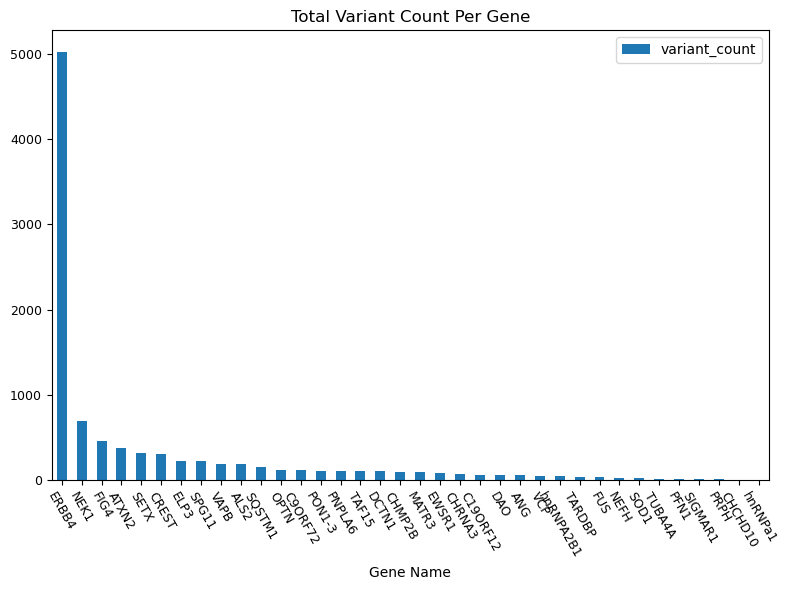

In [30]:
ax= gdf.plot(kind='bar', y="variant_count", x="gene",figsize=(8,6),fontsize=9)
ax.set_title("Total Variant Count Per Gene")
ax.set_xlabel("Gene Name")
plt.xticks(rotation=-60)
plt.tight_layout()
plt.show()

### Top 5 genes in terms of total variant counts across all genomes

In [31]:
top_genes = list(gdf['gene'][0:5])
top_genes

['ERBB4', 'NEK1', 'FIG4', 'ATXN2', 'SETX']

# 2. Create Stacked Bar Chart (2x)
#### -  X axis: genome
#### -  Y axis: variant count
#### -  Take the mean for each gene across the 99 genomes to select the top 5 genes to include in the chart
#### -  Threshold of stacked bar charts: mean + SD, mean - SD

In [32]:
df = pd.read_csv(infile)
df = df[genome_ids]


## 2.1: Get the top genomes and bottom genomes in terms of total variant counts across all genes

In [33]:
hdf=pd.DataFrame()
hdf['count'] = df.sum()

In [34]:
hdf.reset_index(inplace=True)

In [35]:
hdf.head()

,index,count
0,HG01920,1138
1,HG02003,761
2,HG02008,821
3,HG02271,1613
4,HG01973,1187


In [36]:
mean,std = hdf['count'].mean(),hdf['count'].std()
mean,std

(np.float64(1056.164705882353), 318.8134566922595)

## Find top and bottom genomes using mean & STD

In [37]:
top_genomes = list(hdf[hdf['count'] > mean+std]['index'])
bottom_genomes = list(hdf[hdf['count'] < mean-std]['index'])

In [38]:
len(top_genomes)

13

In [39]:
len(bottom_genomes)

16

In [40]:
df = pd.read_csv(infile)
df = df[genome_ids + ['gene']]

sdf=df.groupby(["gene"]).sum()

In [41]:
sdf.head()

,HG01920,HG02003,HG02008,HG02271,HG01973,HG02278,HG01917,HG01997,HG01892,HG01982,...,HG01921,HG02299,HG02265,HG02301,HG01976,HG01565,HG01936,HG01938,HG01933,HG02102
gene,,,,,,,,,,,,,,,,,,,,,
ALS2,3,10,2,6,2,38,0,3,5,2,...,24,7,8,3,9,7,2,35,45,3
ANG,9,0,10,10,6,2,9,10,9,18,...,1,10,1,10,1,9,0,10,9,13
ATXN2,9,11,13,11,16,16,7,10,20,7,...,10,7,11,10,11,16,9,9,166,14
C19ORF12,4,7,6,6,9,8,4,5,7,8,...,10,10,7,11,8,11,20,11,10,7
C9ORF72,15,14,27,16,21,12,1,13,4,12,...,13,14,12,15,24,13,18,15,13,35


In [42]:
tgdf= sdf.loc[top_genes]

In [43]:
tgdf_top_genomes = tgdf[top_genomes]

In [44]:
tgdf_bot_genomes = tgdf[bottom_genomes]

In [45]:
tgdf_top_genomes.head()

,HG02271,HG01967,HG01971,HG01935,HG02006,HG01965,HG02345,HG01947,HG02274,HG02104,HG01577,HG01565,HG01933
gene,,,,,,,,,,,,,
ERBB4,1112,1019,1019,1179,1316,1203,862,1063,893,1207,1036,1002,905
NEK1,195,41,42,43,190,41,220,11,12,11,7,47,13
FIG4,40,50,49,36,98,43,75,68,50,38,21,38,60
ATXN2,11,17,17,12,166,11,14,11,24,16,8,16,166
SETX,7,76,85,10,50,24,8,10,53,10,52,11,57


In [46]:
tgdf_bot_genomes.head()

,HG02285,HG02348,HG02292,HG01932,HG01954,HG02253,HG02147,HG02259,HG01927,HG02298,HG01944,HG01923,HG02105,HG02150,HG02304,HG01936
gene,,,,,,,,,,,,,,,,
ERBB4,326,271,309,422,219,186,326,238,171,396,219,303,251,199,247,266
NEK1,41,7,42,9,11,44,43,38,10,7,7,13,193,9,13,12
FIG4,37,70,19,56,36,23,72,3,42,37,47,71,36,38,50,35
ATXN2,4,12,13,12,25,9,2,11,11,7,7,12,12,19,12,9
SETX,52,5,56,9,10,4,6,7,13,5,45,47,5,49,35,20


## Plot stacked bar chart for top genes & top genomes

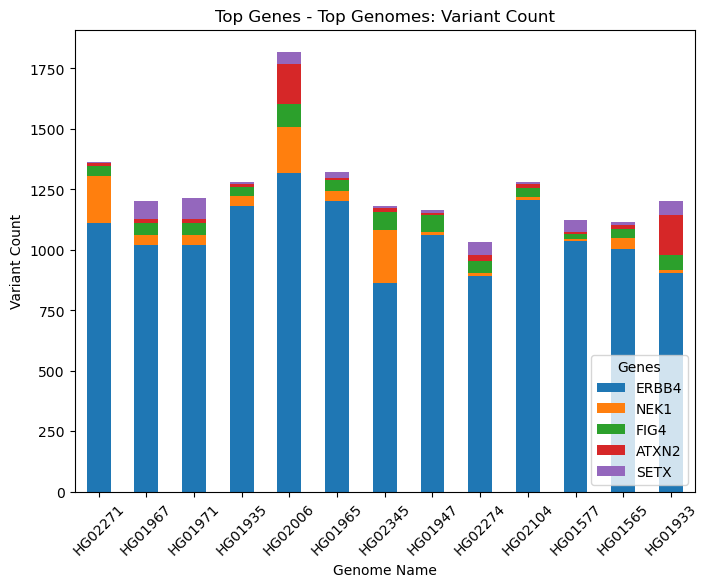

In [47]:
ax = tgdf_top_genomes.transpose().plot.bar(stacked=True,figsize=(8,6))
ax.set_title ('Top Genes - Top Genomes: Variant Count')
ax.set_ylabel('Variant Count')
ax.set_xlabel('Genome Name')
plt.xticks(rotation=45)
plt.legend(title='Genes',loc="lower right")
plt.tight_layout
plt.show()

## Plot stacked bar chart for top genes & bottom genomes

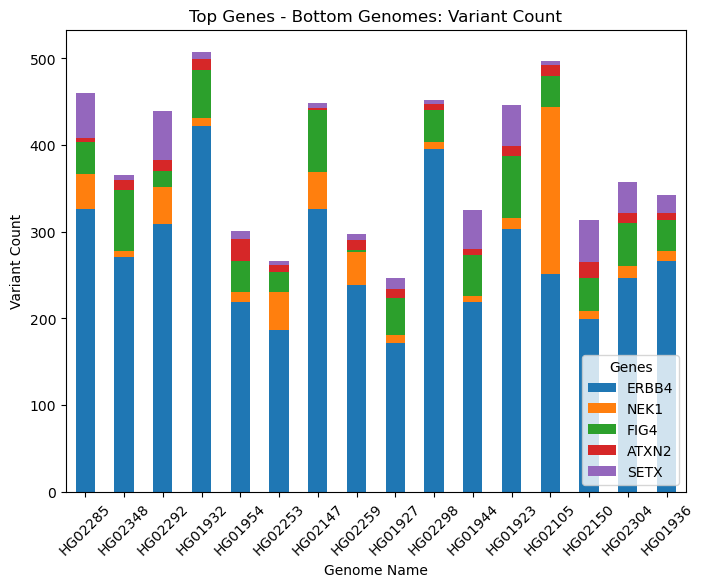

In [48]:
ax = tgdf_bot_genomes.transpose().plot.bar(stacked=True,figsize=(8,6))
ax.set_title ('Top Genes - Bottom Genomes: Variant Count')
ax.set_ylabel('Variant Count')
ax.set_xlabel('Genome Name')
plt.xticks(rotation=45)
plt.legend(title='Genes',loc="lower right")
plt.tight_layout
plt.show()